The original argument matrix:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.95915277 0.
 0.         0.         0.         0.         0.9936685  0.
 0.95778747 0.        ]
The argument matrix calculated with ISTA:
[-0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.          0.          0.92554162  0.
 -0.          0.         -0.          0.          0.93661602  0.
  0.91204185  0.        ]


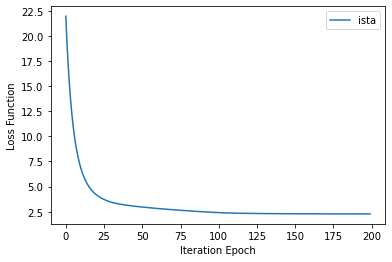

In [53]:
#ISTA求解LASSO问题

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

rng = np.random.RandomState(49) #确定随机种子，便于复现
m, n = 15, 20

X = rng.randn(m, n) #随机初始化数据集中的X

w0 = rng.rand(n) #随机初始化真实的参数矩阵,使其稀疏化
w0[w0 < 0.9] = 0 
Y = np.dot(X, w0) #随机初始化数据集中的Y 
l = 0.8 #L1正则项的系数

def soft_thresh(x, l): #软阈值函数
    return np.sign(x) * np.maximum(np.abs(x) - l, 0.)

def ista(X, Y, l, max_it):
    w = np.zeros(A.shape[1])
    losses = []
    L = linalg.norm(A) ** 2  #Lipschitz常数
    for i in range(maxit):
        w = soft_thresh(w + np.dot(X.T, Y - X.dot(w)) / L, l / L) #进行ISTA迭代过程
        loss = 0.5 * linalg.norm(X.dot(w) - Y) ** 2 + l * linalg.norm(w, 1) #损失函数的值
        losses.append(loss)

    return w,losses

max_it = 3000 #最大迭代次数
w,losses = ista(X,Y,l, max_it)

#输出结果
print('The original argument matrix:')
print(w0)
print('The argument matrix calculated with ISTA:')
print(w)

#损失函数下降过程可视化
plt.figure()
plt.plot(losses, label = 'ista')
plt.xlabel('Iteration Epoch')
plt.ylabel('Loss Function')
plt.legend()
plt.show()